<a href="https://colab.research.google.com/github/sureshmecad/Google-Colab/blob/master/2_PANDAS_time_series.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install pandas

In [ ]:
import pandas as pd

https://towardsdatascience.com/getting-started-with-pandas-time-series-functionality-c10b6ee733a4

### Getting started with Pandas time-series functionality

### 1. Parsing timeseries data automatically
- Pandas can automatically parse columns in a dataset into time-series data, without requiring you to specify any regex patterns.

- To instruct Pandas to convert the values, use the **parse_dates** argument when loading the data.

- Note: the **parse_dates** argument is available in all of Pandas data **loading functions, including read_csv**.

### 1.1 Loading Data

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv('http://bit.ly/30iosS6')
df.head()

,dau,date
0,672,2019-01-01
1,705,2019-01-02
2,538,2019-01-03
3,745,2019-01-04
4,514,2019-01-05


In [ ]:
df.shape

(360, 2)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 360 entries, 0 to 359
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   dau     360 non-null    int64 
 1   date    360 non-null    object
dtypes: int64(1), object(1)
memory usage: 5.8+ KB


### 1.2. parse_dates

In [ ]:
data = pd.read_csv('http://bit.ly/30iosS6', parse_dates=['date'])
data.head()

,dau,date
0,672,2019-01-01
1,705,2019-01-02
2,538,2019-01-03
3,745,2019-01-04
4,514,2019-01-05


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 360 entries, 0 to 359
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   dau     360 non-null    int64         
 1   date    360 non-null    datetime64[ns]
dtypes: datetime64[ns](1), int64(1)
memory usage: 5.8 KB


- Notice how the **Dtype** of the column **date** is **datetime64[ns]**. You can now use all of Pandas’ special datetime methods on the date column.

In [ ]:
data.date.dt.day_name()

0        Tuesday
1      Wednesday
2       Thursday
3         Friday
4       Saturday
         ...    
355       Sunday
356       Monday
357      Tuesday
358    Wednesday
359     Thursday
Name: date, Length: 360, dtype: object

### 2. Filtering timestamp indexes
- Pandas provides convenient filtering methods for a DataFrame when its index is a datetime type.

### 2.1 set_index

In [ ]:
data.set_index('date', inplace=True)
data.index

DatetimeIndex(['2019-01-01', '2019-01-02', '2019-01-03', '2019-01-04',
               '2019-01-05', '2019-01-06', '2019-01-07', '2019-01-08',
               '2019-01-09', '2019-01-10',
               ...
               '2019-12-17', '2019-12-18', '2019-12-19', '2019-12-20',
               '2019-12-21', '2019-12-22', '2019-12-23', '2019-12-24',
               '2019-12-25', '2019-12-26'],
              dtype='datetime64[ns]', name='date', length=360, freq=None)

In [ ]:
data.head()

,dau
date,
2019-01-01,672
2019-01-02,705
2019-01-03,538
2019-01-04,745
2019-01-05,514


### 2.2 Specific Date
- For example, you can select a specific date by passing a string to the DataFrame’s loc accessor.

In [ ]:
data.loc['2019-02-01']

dau    554
Name: 2019-02-01 00:00:00, dtype: int64

### 2.3 Range of Date
- You can also use strings to select ranges of data, ie to slice the DataFrame.

In [ ]:
data.loc['2019-02-01':'2019-03-01']

,dau
date,
2019-02-01,554
2019-02-02,798
2019-02-03,783
2019-02-04,541
2019-02-05,564
2019-02-06,779
2019-02-07,669
2019-02-08,718
2019-02-09,681


- Notice that the index is inclusive of the last value. We used 2019-03-01 as the end of the range we selected, so the row labelled2019–03–01 is included in the resulting DataFrame.

### 2.4 Specific Range
- You can even pass in partial strings to select data for a specific range.

In [ ]:
data.loc['2019-03']

,dau
date,
2019-03-01,599
2019-03-02,724
2019-03-03,521
2019-03-04,544
2019-03-05,650
2019-03-06,798
2019-03-07,650
2019-03-08,524
2019-03-09,696


### 3. Quickly plot time-series data
- Last but not least, you can easily plot the time-series data with Pandas plot function.

<Figure size 1080x720 with 0 Axes>

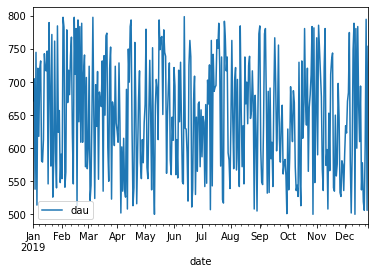

In [ ]:
plt.figure(figsize=(15,10))
data.plot()

- Notice how Pandas has used the DataFrame’s index for the X-axis.

- Of course, this chart isn’t very helpful. Let’s use an aggregate view to produce something more readable.

- To do that, we can use the resample method of the DataFrame to aggregate the timeseries index by month. Then, we’ll calculate the mean of each month and create a bar plot of the result.


<Figure size 1080x720 with 0 Axes>

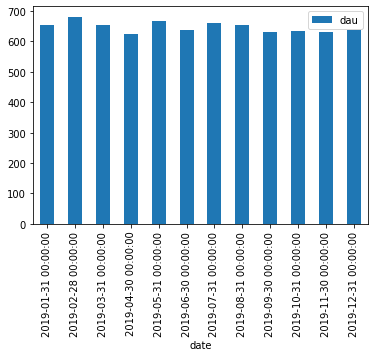

In [ ]:
plt.figure(figsize=(15,10))
data.resample('M').mean().plot.bar()